# External Practical Exam - Practical-1
---
**ID:** 17CE023<br>
**Author:** Bhishm Daslaniya<br>

---
**Aim**: Apply Logistic on Students' Academic Performance Dataset<br>

**Instructions**: 
1. Load Dataset
2. Draw countplot (placeOfBirth vs Count, StudentAbsenceDays vs count, ParentSchoolSatisfaction vs count, Gender Comparison)
3. Draw pairplot (set hue="class")
4. Apply Label Encoding or on-hot encoding on Dataset (Whichever applicable)
5. Apply Logistic Regression and display precision, Recall, F1-score and support

In [14]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading and Exploring Dataset

In [6]:
#Load Dataset
data = pd.read_csv('17ce023 BHISHM DASLANIYA - Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [9]:
print(data.shape)

(480, 17)


In [10]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [12]:
#check for missing values
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## Countplots

In [13]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Tunis            9
Egypt            9
Iran             6
Lybia            6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

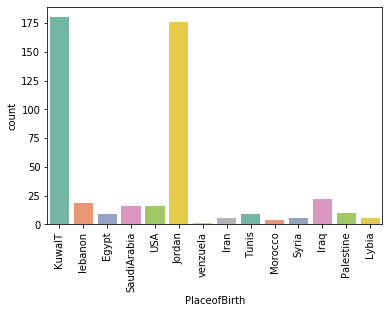

In [77]:
#Plot place of birth vs count
POB = sns.countplot(x = 'PlaceofBirth', data=data, palette='Set2')
POB.set(xlabel='PlaceofBirth',ylabel='count', label= "Students Birth Place")
plt.setp(POB.get_xticklabels(), rotation=90)
plt.show()

In [25]:
data['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

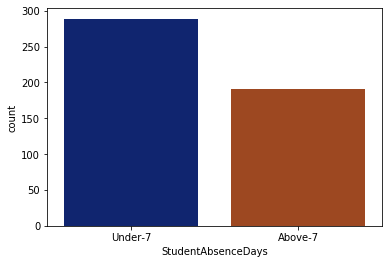

In [46]:
# Student absent day VS count
# Stu_AB = sns.countplot(x='StudentAbsenceDays',data = data,hue = 'Class',palette='dark')
Stu_AB = sns.countplot(x='StudentAbsenceDays',data = data,palette='dark')

In [32]:
data['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

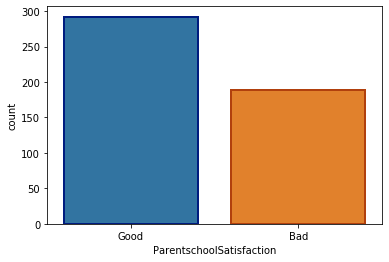

In [40]:
PS_Satisfaction = sns.countplot(x="ParentschoolSatisfaction",data=data,linewidth=2,edgecolor=sns.color_palette("dark"))

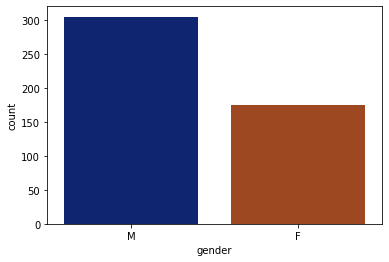

In [48]:
# Gender Comparision Simple
Gender_simple =  sns.countplot(x='gender',data = data,palette='dark')

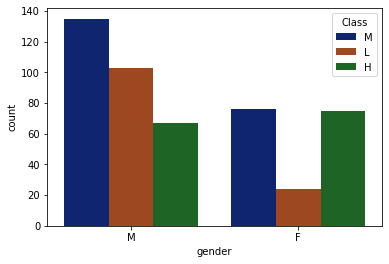

In [49]:
#Gender Comparision Classwise
Gen_compare =  sns.countplot(x='gender',data = data,hue = 'Class',palette='dark')

## Pairplot

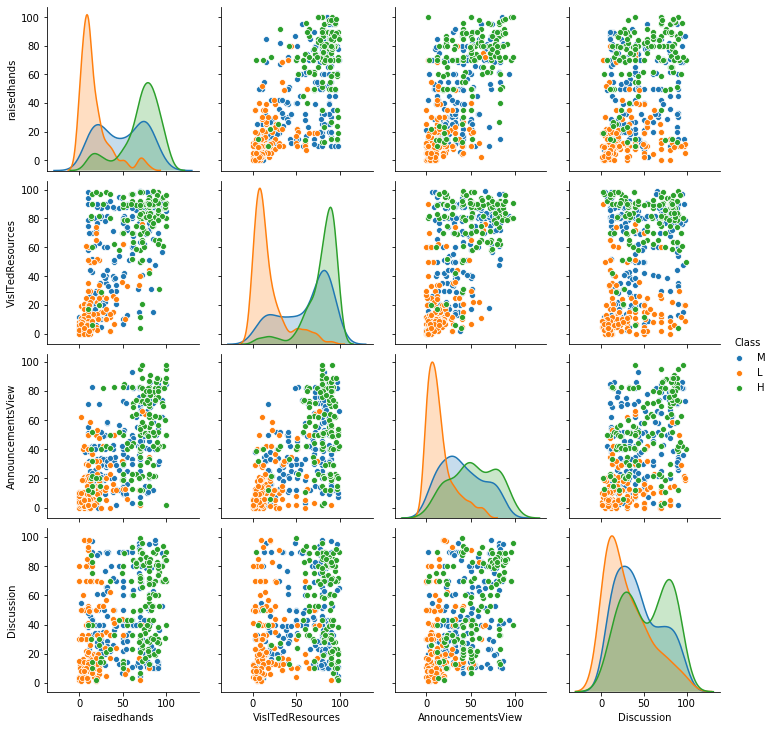

In [50]:
# Pairplot with hue = 'Class'
sns.pairplot(data,hue='Class')

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

### Label Encoding

In [53]:
label = LabelEncoder()

In [57]:
Features = data.drop('Class',axis=1)
Target = data['Class']
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [58]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0


## Applying Logistic Regression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [70]:
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [71]:
Prediction = model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [72]:
print(Prediction)

['L' 'M' 'L' 'L' 'M' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'H' 'L' 'H' 'M'
 'H' 'M' 'H' 'H' 'L' 'L' 'H' 'L' 'H' 'H' 'H' 'L' 'M' 'H' 'L' 'M' 'M' 'M'
 'L' 'M' 'H' 'L' 'H' 'M' 'H' 'M' 'H' 'L' 'M' 'L' 'M' 'L' 'H' 'H' 'M' 'H'
 'H' 'L' 'H' 'L' 'L' 'H' 'L' 'H' 'M' 'M' 'H' 'H' 'L' 'L' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'H' 'M' 'M' 'L' 'M' 'M' 'H' 'M' 'H'
 'L' 'M' 'M' 'H' 'H' 'H']


In [73]:
print(Score)

0.8229166666666666


In [74]:
print(Report)

              precision    recall  f1-score   support

           H       0.78      0.91      0.84        35
           L       0.81      0.95      0.88        22
           M       0.90      0.67      0.76        39

    accuracy                           0.82        96
   macro avg       0.83      0.85      0.83        96
weighted avg       0.83      0.82      0.82        96



---